In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

df = pd.read_csv('/Users/oliverphipps/Dropbox/6. Python/Python Projects/LondonCrimeStatistics/london-stop-and-search.csv',low_memory=False)

df.head(5)

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2015-03-02T16:40:00+00:00,NaN,NaN,NaN,NaN,Male,25-34,Asian or Asian British - Bangladeshi (A3),Asian,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Suspect arrested,True,False
1,Person search,2015-03-02T16:40:00+00:00,NaN,NaN,NaN,NaN,Male,25-34,Asian or Asian British - Bangladeshi (A3),Asian,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Suspect arrested,False,False
2,Person search,2015-03-02T18:45:00+00:00,NaN,NaN,NaN,NaN,Male,25-34,White - Any other White ethnic background (W9),White,Police and Criminal Evidence Act 1984 (section 1),NaN,Suspect arrested,True,True
3,Person search,2015-03-02T19:15:00+00:00,NaN,NaN,NaN,NaN,Male,over 34,White - White British (W1),White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Suspect arrested,False,False
4,Person and Vehicle search,2015-03-03T15:50:00+00:00,NaN,NaN,NaN,NaN,Male,25-34,White - White British (W1),White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Suspect arrested,True,True


In [107]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302623 entries, 0 to 302622
Data columns (total 15 columns):
type                                        302623 non-null object
date                                        302623 non-null object
part_of_a_policing_operation                120808 non-null object
policing_operation                          0 non-null float64
latitude                                    110615 non-null float64
longitude                                   110615 non-null float64
gender                                      299453 non-null object
age_range                                   288579 non-null object
self-defined_ethnicity                      299848 non-null object
officer-defined_ethnicity                   298958 non-null object
legislation                                 302623 non-null object
object_of_search                            216156 non-null object
outcome                                     302623 non-null object
outcome_linked_to_ob

In [110]:
df.drop(['policing_operation', 'self-defined_ethnicity', 'part_of_a_policing_operation', 'latitude', 'longitude', 'outcome_linked_to_object_of_search', 'removal_of_more_than_just_outer_clothing'], axis=1, inplace=True)

In [111]:
df.describe()

,type,date,gender,age_range,officer-defined_ethnicity,legislation,object_of_search,outcome
count,302623,302623,299453,288579,298958,302623,216156,302623
unique,3,168827,3,5,5,5,9,8
top,Person search,2015-10-03T20:50:00+00:00,Male,18-24,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found - no further action
freq,226691,40,280164,117344,130473,187773,134843,207963


In [112]:
df['date'] = pd.to_datetime(df['date']) #converting to datetime as we can see from earlier this is a string currently

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302623 entries, 0 to 302622
Data columns (total 8 columns):
type                         302623 non-null object
date                         302623 non-null datetime64[ns]
gender                       299453 non-null object
age_range                    288579 non-null object
officer-defined_ethnicity    298958 non-null object
legislation                  302623 non-null object
object_of_search             216156 non-null object
outcome                      302623 non-null object
dtypes: datetime64[ns](1), object(7)
memory usage: 18.5+ MB


In [114]:
df['date'] = df['date'].dt.date

In [115]:
df.head()

,type,date,gender,age_range,officer-defined_ethnicity,legislation,object_of_search,outcome
0,Person search,2015-03-02,Male,25-34,Asian,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Suspect arrested
1,Person search,2015-03-02,Male,25-34,Asian,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Suspect arrested
2,Person search,2015-03-02,Male,25-34,White,Police and Criminal Evidence Act 1984 (section 1),NaN,Suspect arrested
3,Person search,2015-03-02,Male,over 34,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Suspect arrested
4,Person and Vehicle search,2015-03-03,Male,25-34,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Suspect arrested


In [116]:
df.isnull().sum()

type                             0
date                             0
gender                        3170
age_range                    14044
officer-defined_ethnicity     3665
legislation                      0
object_of_search             86467
outcome                          0
dtype: int64

In [117]:
df_clean = df.dropna() #remove all null values so we have clean dataset

In [118]:
df_clean.info() #quick check

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205461 entries, 0 to 302622
Data columns (total 8 columns):
type                         205461 non-null object
date                         205461 non-null object
gender                       205461 non-null object
age_range                    205461 non-null object
officer-defined_ethnicity    205461 non-null object
legislation                  205461 non-null object
object_of_search             205461 non-null object
outcome                      205461 non-null object
dtypes: object(8)
memory usage: 14.1+ MB


In [119]:
#this will tell us when the first and last report in the dataset it
unique_reports = df_clean['date'].unique()
unique_reports

first_report = unique_reports[0]
last_report = unique_reports[-1]

first_report,last_report

(datetime.date(2015, 3, 2), datetime.date(2017, 4, 30))

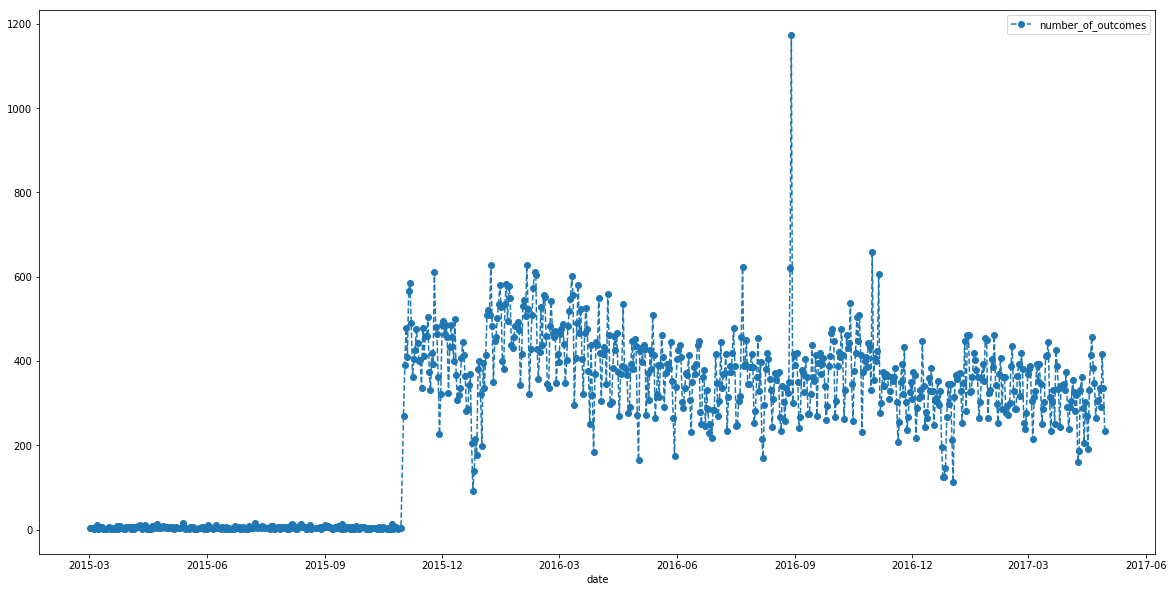

In [120]:
plot_month = df_clean.groupby('date').size().reset_index(name='number_of_outcomes').set_index('date')
plot_month
plot_month.plot(kind='line', figsize=(20,10), linestyle='--', marker='o');

In [121]:
#there is a lot of blank data for 2015, I am going to remove this from the dataframe
df['date'] = pd.to_datetime(df['date'])
df_clean = df[df['date'].dt.year != 2015]

In [122]:
#this will tell us when the first and last report in the dataset it and see if its removed 2015
unique_reports = df_clean['date'].unique()
unique_reports

first_report = unique_reports[0]
last_report = unique_reports[-1]

first_report,last_report

(numpy.datetime64('2016-01-01T00:00:00.000000000'),
 numpy.datetime64('2017-04-30T00:00:00.000000000'))

In [123]:
df_clean = df_clean.dropna()

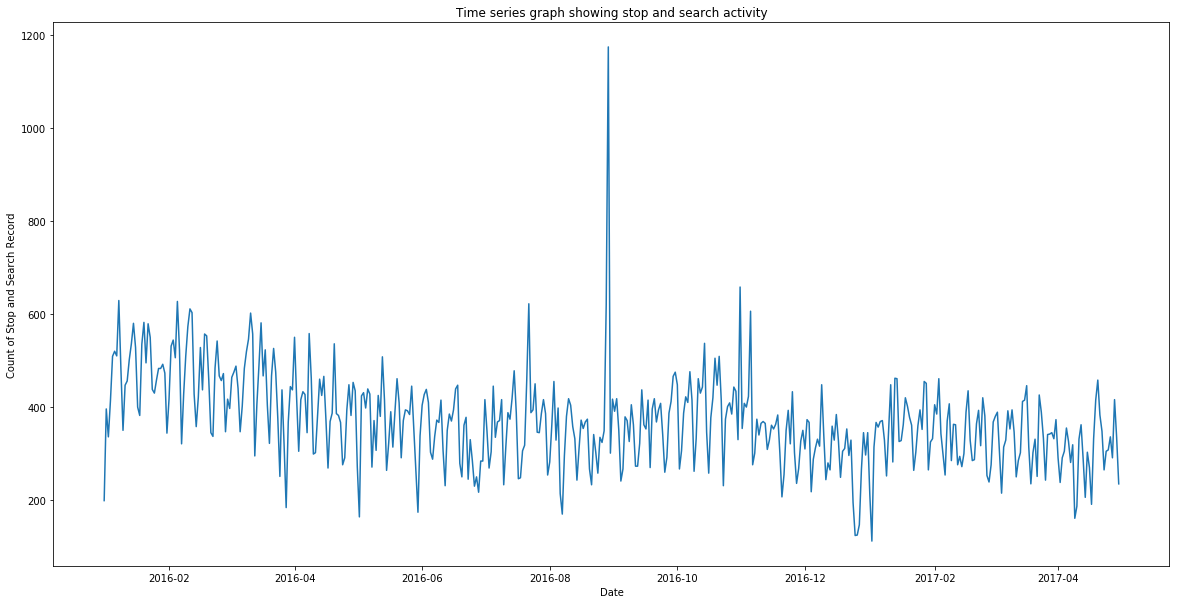

In [181]:
x = df_clean.groupby('date').size()

plt.figure(figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('Count of Stop and Search Record')
plt.title('Time series graph showing stop and search activity')
plt.plot(x);

In [125]:
df_clean['officer-defined_ethnicity'].value_counts()

White    77686
Black    70324
Asian    26846
Other     5752
Name: officer-defined_ethnicity, dtype: int64

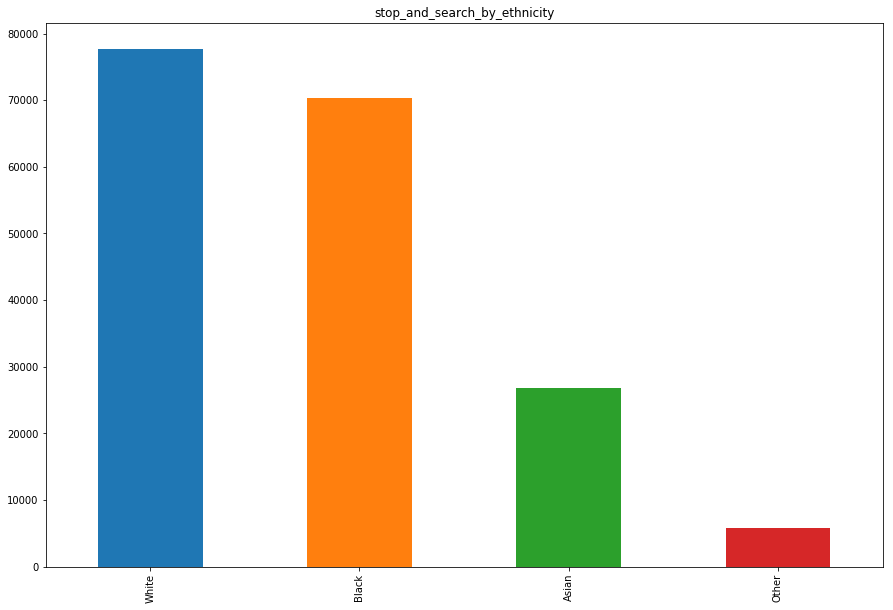

In [180]:
df_clean['officer-defined_ethnicity'].value_counts().plot.bar(title='stop_and_search_by_ethnicity',figsize=(15,10));

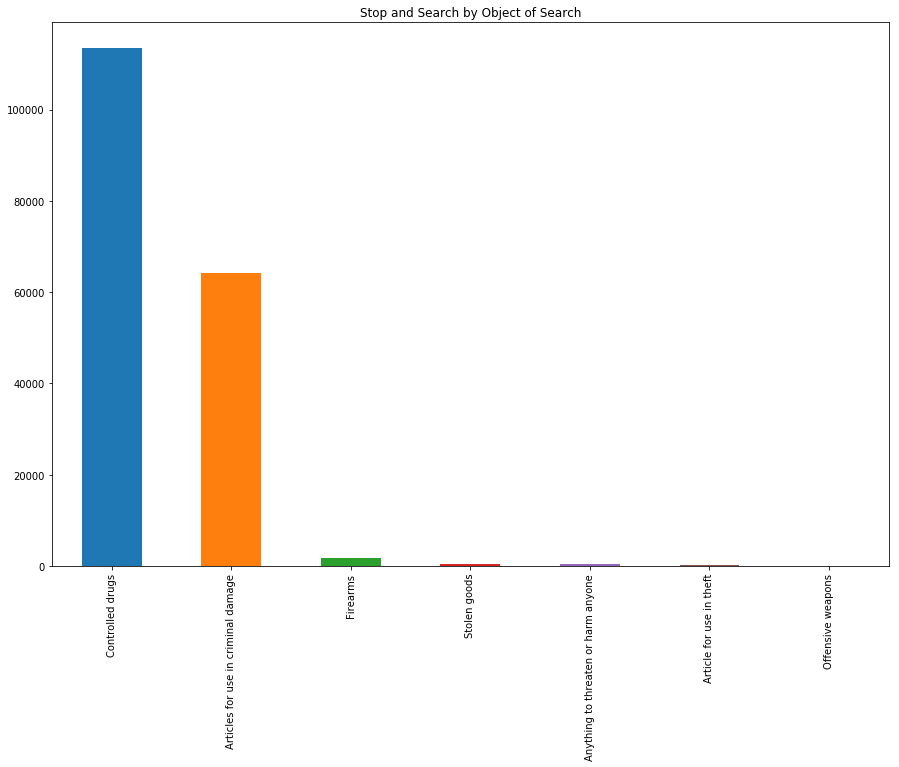

In [182]:
df_clean['object_of_search'].value_counts().plot.bar(title='Stop and Search by Object of Search',figsize=(15,10));

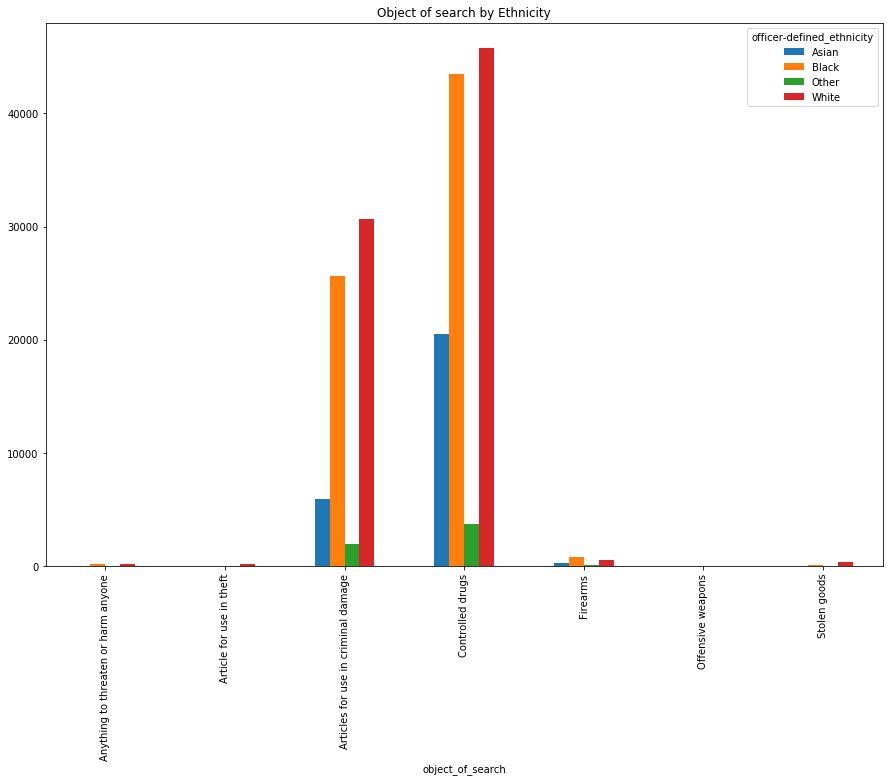

In [178]:
df_clean.groupby('officer-defined_ethnicity')['object_of_search'].value_counts().unstack(0).plot.bar(title='Object of search by Ethnicity', figsize=(15,10));

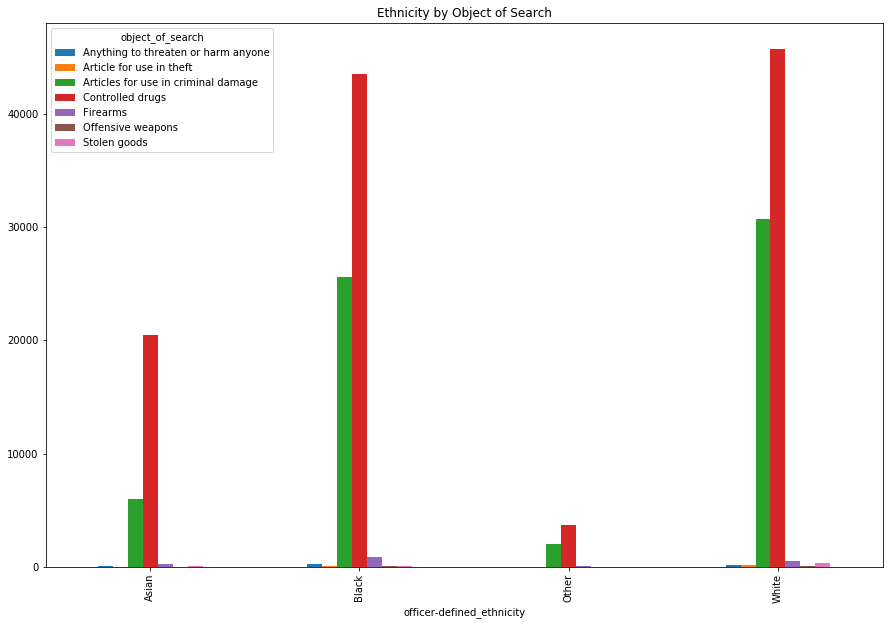

In [177]:
df_clean.groupby('object_of_search')['officer-defined_ethnicity'].value_counts().unstack(0).plot.bar(title='Ethnicity by Object of Search', figsize=(15,10));

In [183]:
counts = df_clean['object_of_search'].value_counts()
counts
counts[counts > 5000]

Controlled drugs                       113430
Articles for use in criminal damage     64234
Name: object_of_search, dtype: int64

In [184]:
drugs = df_clean.object_of_search == 'Controlled drugs'
criminal_damage = df_clean.object_of_search == 'Articles for use in criminal damage'

In [185]:
drugs_p_crimdam = df_clean.object_of_search[criminal_damage].count() + df_clean.object_of_search[criminal_damage].count()

In [186]:
drugs_prc = df_clean.object_of_search[drugs].count() / drugs_p_crimdam
criminal_damage_prc = df_clean.object_of_search[criminal_damage].count() / drugs_p_crimdam

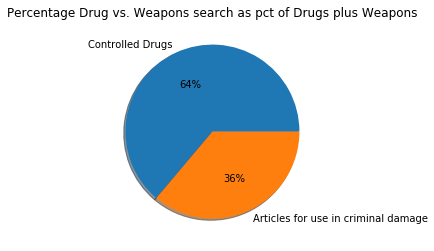

In [187]:
# this will plot a pie chart for us
labels = 'Controlled Drugs', 'Articles for use in criminal damage'
fracs = [drugs_prc, criminal_damage_prc]
explode = (0,0)
plt.axis("equal")
plt.title('Percentage Drug vs. Weapons search as pct of Drugs plus Weapons')
plt.pie(fracs, explode=explode, labels=labels, autopct='%.0f%%', shadow=True);